<a href="https://colab.research.google.com/github/Miit-009/Jio-Institute/blob/main/Session_8_MRM_Samsung_Face_Emotions.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
pip install opencv-python deepface matplotlib


     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 87.2/87.2 kB 4.2 MB/s eta 0:00:00
  Preparing metadata (setup.py) ... done
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 108.6/108.6 kB 4.6 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 85.0/85.0 kB 6.2 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 1.9/1.9 MB 31.3 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 1.3/1.3 MB 41.7 MB/s eta 0:00:00
  Created wheel for fire: filename=fire-0.7.0-py3-none-any.whl size=114249 sha256=cddc218981fedbe0e18e51c38f5190331633ceb795333b90dfdab48ae8c73713
  Stored in directory: /root/.cache/pip/wheels/46/54/24/1624fd5b8674eb1188623f7e8e17cdf7c0f6c24b609dfb8a89
Successfully built fire


25-02-10 07:14:04 - Directory /root/.deepface has been created
25-02-10 07:14:04 - Directory /root/.deepface/weights has been created
25-02-10 07:14:06 - facial_expression_model_weights.h5 will be downloaded...


Downloading...
From: https://github.com/serengil/deepface_models/releases/download/v1.0/facial_expression_model_weights.h5
To: /root/.deepface/weights/facial_expression_model_weights.h5
100%|██████████| 5.98M/5.98M [00:00<00:00, 66.7MB/s]


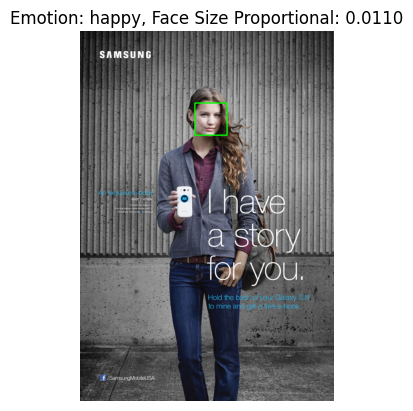

In [2]:
import cv2
from deepface import DeepFace
import matplotlib.pyplot as plt

# Load the image
image_path = 'Samsung poster.jpg'
img = cv2.imread(image_path)
img_rgb = cv2.cvtColor(img, cv2.COLOR_BGR2RGB)

# Detect face using OpenCV
face_cascade = cv2.CascadeClassifier(cv2.data.haarcascades + 'haarcascade_frontalface_default.xml')
faces = face_cascade.detectMultiScale(img_rgb, scaleFactor=1.1, minNeighbors=5, minSize=(30, 30))

# Analyze the emotion using DeepFace
emotion = ""
if len(faces) > 0:
    # Get the first face detected (you can extend this for multiple faces)
    x, y, w, h = faces[0]
    face_img = img_rgb[y:y+h, x:x+w]

    # Use DeepFace to detect emotion
    emotion_result = DeepFace.analyze(face_img, actions=['emotion'], enforce_detection=False)
    emotion = emotion_result[0]['dominant_emotion']

    # Calculate the face size proportional to the entire image
    face_size = (w * h) / (img_rgb.shape[0] * img_rgb.shape[1])

    # Draw a rectangle around the face
    img_rgb = cv2.rectangle(img_rgb, (x, y), (x + w, y + h), (0, 255, 0), 2)

    # Display the result
    plt.imshow(img_rgb)
    plt.title(f"Emotion: {emotion}, Face Size Proportional: {face_size:.4f}")
    plt.axis('off')
    plt.show()

else:
    print("No faces detected in the image.")


In [3]:
result = DeepFace.analyze(face_img, actions=['emotion', 'age', 'gender'], enforce_detection=False)
age = result[0]['age']
gender = result[0]['gender']
emotion = result[0]['dominant_emotion']

print(f"Emotion: {emotion}, Age: {age}, Gender: {gender}")


Action: age:   0%|          | 0/3 [00:00<?, ?it/s]    

25-02-10 07:15:45 - age_model_weights.h5 will be downloaded...


Downloading...
From: https://github.com/serengil/deepface_models/releases/download/v1.0/age_model_weights.h5
To: /root/.deepface/weights/age_model_weights.h5

  0%|          | 0.00/539M [00:00<?, ?B/s]
  2%|▏         | 11.0M/539M [00:00<00:05, 105MB/s]
  8%|▊         | 42.5M/539M [00:00<00:02, 221MB/s]
 14%|█▍        | 74.4M/539M [00:00<00:01, 265MB/s]
 19%|█▉        | 104M/539M [00:00<00:01, 278MB/s] 
 25%|██▍       | 133M/539M [00:00<00:01, 277MB/s]
 30%|██▉       | 161M/539M [00:00<00:01, 279MB/s]
 35%|███▌      | 190M/539M [00:00<00:01, 259MB/s]
 40%|████      | 216M/539M [00:00<00:01, 254MB/s]
 45%|████▍     | 242M/539M [00:00<00:01, 245MB/s]
 50%|████▉     | 268M/539M [00:01<00:01, 250MB/s]
 55%|█████▌    | 297M/539M [00:01<00:00, 260MB/s]
 60%|██████    | 324M/539M [00:01<00:00, 263MB/s]
 65%|██████▌   | 351M/539M [00:01<00:00, 253MB/s]
 70%|███████   | 380M/539M [00:01<00:00, 262MB/s]
 75%|███████▌  | 406M/539M [00:01<00:00, 258MB/s]
 81%|████████  | 434M/539M [00:01<00:00, 264

25-02-10 07:15:51 - gender_model_weights.h5 will be downloaded...


Downloading...
From: https://github.com/serengil/deepface_models/releases/download/v1.0/gender_model_weights.h5
To: /root/.deepface/weights/gender_model_weights.h5

  0%|          | 0.00/537M [00:00<?, ?B/s]
  1%|▏         | 7.34M/537M [00:00<00:07, 73.0MB/s]
  6%|▌         | 32.0M/537M [00:00<00:03, 166MB/s] 
 11%|█         | 59.2M/537M [00:00<00:02, 208MB/s]
 16%|█▋        | 88.6M/537M [00:00<00:01, 240MB/s]
 21%|██        | 114M/537M [00:00<00:01, 241MB/s] 
 26%|██▋       | 141M/537M [00:00<00:01, 251MB/s]
 31%|███       | 166M/537M [00:00<00:01, 242MB/s]
 36%|███▋      | 195M/537M [00:00<00:01, 256MB/s]
 41%|████      | 221M/537M [00:00<00:01, 256MB/s]
 46%|████▌     | 246M/537M [00:01<00:01, 255MB/s]
 51%|█████     | 274M/537M [00:01<00:01, 260MB/s]
 56%|█████▌    | 300M/537M [00:01<00:00, 251MB/s]
 61%|██████    | 327M/537M [00:01<00:00, 256MB/s]
 66%|██████▌   | 353M/537M [00:01<00:00, 250MB/s]
 70%|███████   | 379M/537M [00:01<00:00, 246MB/s]
 75%|███████▌  | 405M/537M [00:01<0

Emotion: happy, Age: 30, Gender: {'Woman': 96.93519473075867, 'Man': 3.0648015439510345}


In [4]:
result = DeepFace.analyze(face_img, actions=['emotion'], enforce_detection=False)
emotions = result[0]['emotion']
for emotion, score in emotions.items():
    print(f"{emotion}: {score:.2f}")


angry: 0.00
disgust: 0.00
fear: 0.29
happy: 98.68
sad: 0.01
surprise: 0.01
neutral: 1.01


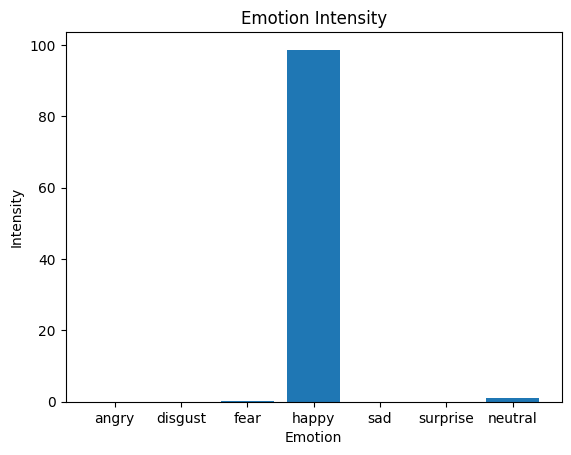

In [5]:
result = DeepFace.analyze(face_img, actions=['emotion'], enforce_detection=False)
emotions = result[0]['emotion']

plt.bar(emotions.keys(), emotions.values())
plt.xlabel('Emotion')
plt.ylabel('Intensity')
plt.title('Emotion Intensity')
plt.show()


In [6]:
pip install face_recognition


     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 100.1/100.1 MB 8.7 MB/s eta 0:00:00
  Preparing metadata (setup.py) ... done
  Created wheel for face-recognition-models: filename=face_recognition_models-0.3.0-py2.py3-none-any.whl size=100566162 sha256=21758aa9017ef66f2a4cd1dda1f448e83017768f49d19e6c00e2310635d17b19
  Stored in directory: /root/.cache/pip/wheels/04/52/ec/9355da79c29f160b038a20c784db2803c2f9fa2c8a462c176a
Successfully built face-recognition-models


In [7]:
import face_recognition

known_image = face_recognition.load_image_file("known_person.jpg")
unknown_image = face_recognition.load_image_file("Samsung poster.jpg")

known_face_encoding = face_recognition.face_encodings(known_image)[0]
unknown_face_encoding = face_recognition.face_encodings(unknown_image)[0]

results = face_recognition.compare_faces([known_face_encoding], unknown_face_encoding)
if results[0]:
    print("This is the known person!")
else:
    print("This is an unknown person.")


RuntimeError: Error while calling cudaGetDevice(&the_device_id) in file /root/.cache/uv/sdists-v4/pypi/dlib/19.24.2/wJ21y9fWLAAfM7Pm6Ge3a/dlib-19.24.2.tar.gz/dlib/cuda/gpu_data.cpp:204. code: 35, reason: CUDA driver version is insufficient for CUDA runtime version

In [8]:
face_img = cv2.GaussianBlur(face_img, (15, 15), 0)
